<a href="https://colab.research.google.com/github/JaeDoo1034/DACON_EMNIST/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**영화 리뷰 분류 : 이진 분류 예제**

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# num_words = 10000 : 훈련 데이터에서 가장 자주 나타나는 단어 1만개 사용하겠다.
# label 설명 : 부정을 나타내는 0, 긍정을 나타내는 1

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
# 가장 자주 등자하는 단어 1만개로 제한했기 때문에 단어 인덱스는 9,999를 넘지 않습니다.
max([max(sequence) for sequence in train_data])

9999

재미 삼아 이 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 보겠습니다

In [ ]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리 입니다.
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()] # 정수 인덱스와 단어를 매핑하도록 뒤집습니다.
)
decode_review = ' '.join([reverse_word_index.get(i-3 , '?') for i in train_data[0]]) # 리뷰를 디코딩합니다. 0,1,2,는 '패딩','문서시작','사전에 없음'을 위한 인덱스이므로 3을 뺍니다.

In [ ]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**데이터 준비**

* Input data 준비방법<br>
1) 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length)크기의 정수 텐서로 변환합니다. 그 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다.(Embedding층을 말하며 나중에 다시 자세히..!!) <br>
2) 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환합니다. 예를 들어 시퀀스 [3,5]를 인덱스 3과 5의 위치는 1이고 그 이외는 모두 0인 10,000차원의 벡터로 각각 변환합니다. 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용합니다.

In [ ]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

In [ ]:
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension)) # 크기가 len(sequence), dimension 이고 모든 원소가 0인 행렬을 만듭니다.
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 레이블을 쉽게 벡터로 변경 가능
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**신경망 모델 만들기**

In [ ]:
# 모델 정의하기
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

크로스엔트로피 : 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정합니다. 여기에서는 원본 분포와 예측 분포 사이를 측정합니다.

In [ ]:
# 측정 지표를 문자열로 지정하는 것이 가능.
model.compile(optimizer= 'rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
# 파이썬 클래스를 사용해서 객체를 직접 만들어 optimizer 매개변수에 전달.
from tensorflow.keras import optimizers,losses,metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

**훈련 검증**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# 모델 훈련하기
model.compile(optimizer= 'rmsprop',loss= 'binary_crossentropy',metrics = ['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size=512,validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5144 - acc: 0.7981 - val_loss: 0.3887 - val_acc: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3069 - acc: 0.9034 - val_loss: 0.3152 - val_acc: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2245 - acc: 0.9270 - val_loss: 0.2775 - val_acc: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1744 - acc: 0.9445 - val_loss: 0.2788 - val_acc: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1455 - acc: 0.9518 - val_loss: 0.2804 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1183 - acc: 0.9645 - val_loss: 0.2924 - val_acc: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0973 - acc: 0.9702 - val_loss: 0.3490 - val_acc: 0.8725
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0829 - a

In [ ]:
# model_fit() 메서드는 History객체를 반환합니다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history속성을 가지고 있습니다.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

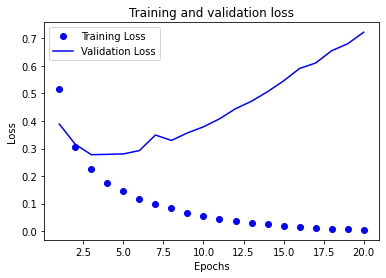

In [ ]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict= history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'bo',label = 'Training Loss') # bo : 파란색 점을 의미
plt.plot(epochs, val_loss , 'b', label = 'Validation Loss') # b : 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

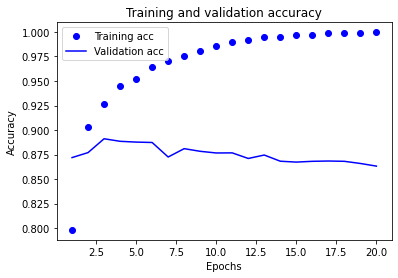

In [ ]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 모델을 처음부터 다시 훈련하기
# fit()메서드를 재호출하면 학습된 가중치에서 훈련이 이어지므로 처음 다시 학습하려면 모델 객체를 새로 만들어야 합니다.
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation= 'sigmoid'))

model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4537 - accuracy: 0.8176
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2596 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1998 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2958 - accuracy: 0.8837


In [ ]:
results

[0.29583078622817993, 0.8837199807167053]

아주 단순한 방식으로도 88% 정확도를 달성

**훈련된 모델로 새로운 데이터에 대해 예측하기**

In [ ]:
model.predict(x_test) # predict를 사용해 어떤 리뷰가 긍정일지 예측! 여기처럼 이 모델은 어떤 샘플에 대해 확신을 가지고 있지만 어떤 샘플에 대해서는 확신이 부족합니다.

array([[0.16590068],
       [0.9999385 ],
       [0.91627   ],
       ...,
       [0.110755  ],
       [0.07662832],
       [0.47889557]], dtype=float32)

**추가실험**

In [ ]:
def model(units,activation,loss):
  model_plus = models.Sequential()
  model_plus.add(layers.Dense(units,activation= activation,input_shape = (10000,)))
  model_plus.add(layers.Dense(units,activation=activation))
  model_plus.add(layers.Dense(1,activation='sigmoid'))

  model_plus.compile(optimizer= 'rmsprop',loss = loss,metrics=['acc'])
  return model_plus

In [ ]:
model_plus = model(64,'tanh','mse') # 32 -> 64 : 검증 정확도 하락. relu -> tanh : 검증 정확도 하락

In [ ]:
model_plus.fit(x_train,y_train,epochs = 4,batch_size = 512)
results = model_plus.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1295 - acc: 0.8186
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0659 - acc: 0.9130
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0528 - acc: 0.9320
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.1180 - acc: 0.8514


[0.11797881126403809, 0.8514000177383423]

**다중분류문제**

로이터 데이터 셋

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words= 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data) # 훈련 샘플

8982

In [ ]:
len(test_data) # 테스트ㅡ 샘플

2246

In [ ]:
# 각 샘플은 정루 리스트(단어 인덱스)로 표현
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
# 로이터 데이터셋을 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # i-3이 없으면 ? 출력

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수입니다.
train_labels[10]

3

데이터 **준비**

In [ ]:
# 데이터를 벡터로 변환!
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension)) # 크기가 len(sequence), dimension 이고 모든 원소가 0인 행렬을 만듭니다.
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1.
  return results

In [ ]:
one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

레이블을 벡터로 바꾸는 방법은 2가지 존재<br>
1) 레이블의 리스트를 정수 텐서로 변환하는 것<br>
2) 원-핫 인코딩을 사용하는 것 -> 범주형 인코딩(categorical encoding)이라고도 부림

In [ ]:
# 원핫 인코딩 내장함수 존재
from tensorflow.keras.utils import to_categorical

In [ ]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**모델구성**

출력 클래스 수가 2 -> 46.. 출력 공간의 차원이 훨씬 커짐.<br>
Dense층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사욯가능.. 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 이를 복원할 방법이 없습니다.<br>
각 층은 잠재적으로 정보의 병목(information bottleneck)이 될 수 있습니다. 이전 예제에서 16차원을 가진 중간층을 사용했지만 16차원 공간은 46개의 클래스를 구분하기에 너무 제약이 많을 것같습니다.<br>
이렇게 규모자 작은 층은 유용한 정보를 완정히 잃게 되는 "정보의 병목지점"처럼 동작할 수 있습니다.<br>
이런 이유로 좀 더 규모가 큰 층을 사용하겠습니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation= 'softmax'))

이런 문제에 사용할 최선의 손실함수는 categorical_crossentropy입니다.<br>
이 함수는 두 확률 분포 사이의 거리를 측정합니다. 여기에서는 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리입니다. 두 분포 사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련합니다.

In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['acc'])

**훈련 검증**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size=512,validation_data= (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 26ms/step - loss: 2.5712 - acc: 0.5204 - val_loss: 1.6737 - val_acc: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3942 - acc: 0.7065 - val_loss: 1.2753 - val_acc: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0383 - acc: 0.7701 - val_loss: 1.1613 - val_acc: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8201 - acc: 0.8213 - val_loss: 1.0222 - val_acc: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6507 - acc: 0.8631 - val_loss: 0.9726 - val_acc: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5156 - acc: 0.8940 - val_loss: 0.9030 - val_acc: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4166 - acc: 0.9126 - val_loss: 0.8902 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3382 - a

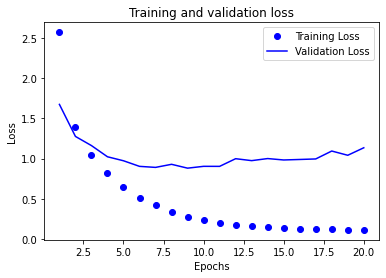

In [ ]:
# 훈련 손실과 검증 손실 그래프
history_dict= history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'bo',label = 'Training Loss') # bo : 파란색 점을 의미
plt.plot(epochs, val_loss , 'b', label = 'Validation Loss') # b : 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

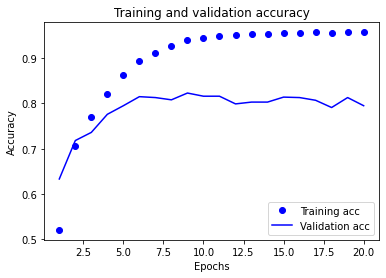

In [ ]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9번째 에포크 이후에 과대적합 시작. 아홉 번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가하겠습니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation= 'softmax'))


model.compile(optimizer='rmsprop',loss= 'categorical_crossentropy',metrics=['acc'])
model.fit(partial_x_train,partial_y_train,epochs = 9,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 23ms/step - loss: 2.5801 - acc: 0.5114 - val_loss: 1.7042 - val_acc: 0.6530
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.3982 - acc: 0.7086 - val_loss: 1.2926 - val_acc: 0.7290
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0473 - acc: 0.7735 - val_loss: 1.1265 - val_acc: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8218 - acc: 0.8255 - val_loss: 1.0438 - val_acc: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6534 - acc: 0.8632 - val_loss: 0.9773 - val_acc: 0.7910
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5243 - acc: 0.8911 - val_loss: 0.9235 - val_acc: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4196 - acc: 0.9133 - val_loss: 0.9404 - val_acc: 0.7920
Epoch 8/9
16/16 [==============================] - 0s 14ms/step - loss: 0.3455 - acc: 0.92

In [ ]:
results # 대략 79% 정확도 달성

[0.9833152890205383, 0.7920747995376587]

새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(x_test)

In [ ]:
# predictions의 각 항목은 길이가 46인 벡터입니다.
predictions[0].shape

(46,)

In [ ]:
# 이 벡터의 원소 합은 1입니다.
np.sum(predictions[0])

1.0000001

In [ ]:
# 가장 큰 값이 예측 클래스가 됩니다. 즉, 가장 확률이 높은 클래스입니다.
np.argmax(predictions[0])

3

**레이블과 손실을 다루는 방법**

레이블을 인코딩하는 다른 방법은 정수 텐서로 변환하는 것.<br>
이 방식을 사용하려면 손실 함수 하나만 바꾸면 됩니다.<br>
loss : categorical_crossentropy -> "sparse_categorical_crossentropy"로 변경

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',loss = 'sparse_categorical_crossentropy',metrics=['acc'])

**충분히 큰 중간층을 두어야 하는 이유**

마지막 출력이 46차원이기 때문에 중간 층의 히든 유닛이 46개 보다 많이 적어서는 안됩니다.<br>
46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 "정보의 병목"이 어떻게 나타나는지 확인해보겠습니다.

In [ ]:
# 정보의 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(4,activation = 'relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = 'acc')

In [ ]:
model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size = 128,validation_data = (x_val,y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.0847 - acc: 0.2103 - val_loss: 2.3832 - val_acc: 0.3850
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.9442 - acc: 0.5704 - val_loss: 1.7100 - val_acc: 0.6050
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5013 - acc: 0.6353 - val_loss: 1.5262 - val_acc: 0.6320
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3041 - acc: 0.6560 - val_loss: 1.4258 - val_acc: 0.6480
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1579 - acc: 0.7005 - val_loss: 1.3834 - val_acc: 0.6660
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0446 - acc: 0.7156 - val_loss: 1.3567 - val_acc: 0.6730
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9512 - acc: 0.7368 - val_loss: 1.3520 - val_acc: 0.6870
Epoch 8/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8683 - acc: 0.76

검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 이런 손실의 원인 대부분은 많은 정보(클래스 46개의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.